In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Predator Prey Model Remade

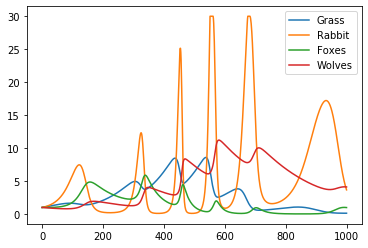

In [141]:
GrassG = 1
GrassD = .2
RabbitB = 2
RabbitD = 1
FoxC = .4
FoxD = .5
WolfC = .1
WolfD = .5

nsteps = 1000
dt = 0.01
G = np.zeros(nsteps)
R = np.zeros(nsteps)
F = np.zeros(nsteps)
W = np.zeros(nsteps)
G[0] = 1
R[0] = 1
F[0] = 1
W[0] = 1
for i in range(1,nsteps):
    G[i] = G[i-1] + dt*(GrassG*G[i-1] - GrassD*G[i-1]*R[i-1])
    R[i] = R[i-1] + dt*(RabbitB*R[i-1]*G[i-1] - RabbitD*R[i-1]*F[i-1]*W[i-1])
    if R[i] > 30:
        R[i] = 30
    F[i] = F[i-1] + dt*(FoxC*F[i-1]*R[i-1] - FoxD*F[i-1]*W[i-1])
    W[i] = W[i-1] + dt*(WolfC*W[i-1]*F[i-1]*R[i-1] - WolfD*W[i-1])

fig = plt.figure()
plt.plot(G,label = 'Grass')
plt.plot(R,label = 'Rabbit')
plt.plot(F,label = 'Foxes')
plt.plot(W,label = 'Wolves')
plt.legend(loc = 'upper right');

# Now to the Regularly Scheduled Class Program

In [44]:
def gini(x):
    y = np.sort(x)
    upper_sum = 0
    n = len(x)
    for i in range(len(y)):
        upper_sum += (i+1)*y[i]
    return 1 - 2/(n-1)*(n - upper_sum/sum(y))

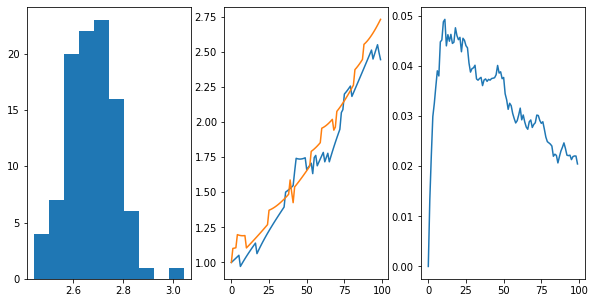

In [162]:
nsteps = 100
npeople = 100
trades_per_step = 10
wealth = np.ones(shape = (nsteps,npeople))
coin = .1
intrest = 0.01
r = .1
gini.history = np.zeros(nsteps)

for t in range(1,nsteps):
    
    wealth[t,:] = wealth[t-1,:]*(1+intrest)
    
    for i in range(trades_per_step):
        p1 = np.random.randint(low = 0,high = npeople)
        p2 = np.random.randint(low = 0,high = npeople)
        if wealth[t,p1] > 0:
            wealth[t,p1] -= coin
            wealth[t,p2] += coin
    tax = r*sum(wealth[t,:])
    wealth[t,:] = (1-r)*wealth[t,:]
    wealth[t,:] += tax/npeople    
    gini.history[t] = gini(wealth[t,:])


plt.figure(figsize = (10,5))          
poor_one = np.argmin(wealth[-1,:])
rich_one = np.argmax(wealth[1,:])
plt.subplot(1,3,1)
plt.hist(wealth[-1,:],bins = 10)
plt.subplot(1,3,2)
plt.plot(wealth[:,poor_one]);
plt.plot(wealth[:,rich_one]);
plt.subplot(1,3,3)
plt.plot(gini.history);
